<a href="https://colab.research.google.com/github/kmeng01/rome/blob/main/notebooks/rome.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" align="left"/></a>&nbsp;or in a local notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir memit
!cp -R drive/MyDrive/memit/* memit

^C


In [ ]:
!mkdir rome
!cp -R drive/MyDrive/rome2/* rome

In [ ]:
!cp -R rome/* drive/MyDrive/rome2/

In [ ]:
%%bash
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit
pip install -r /content/memit/scripts/colab_reqs/rome.txt >> install.log 2>&1
pip install --upgrade google-cloud-storage >> install.log 2>&1
pip install transformers >> install.log 2>&1
# pip install higher hydra-core allennlp einops datasets accelerate>> install.log 2>&1

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Edit

In [ ]:
%cd rome
!python experiments/evaluate.py \
    --alg_name=ROME \
    --model_name=gpt2-xl \
    --hparams_fname=gpt2-xl.json \
    --skip_generation_tests
%cd ..

Streaming output truncated to the last 5000 lines.
Rewrite layer is 17
Tying optimization objective to 47
Recording initial value of v*
loss 13.146 = 13.146 + 0.0 + 0.0 avg prob of [ Spanish] 4.03154353989521e-06
loss 13.134 = 13.134 + 0.0 + 0.0 avg prob of [ Spanish] 4.104425897821784e-06
loss 13.122 = 13.122 + 0.0 + 0.0 avg prob of [ Spanish] 4.177862138021737e-06
loss 13.11 = 13.109 + 0.0 + 0.0 avg prob of [ Spanish] 4.25306279794313e-06
loss 13.096 = 13.096 + 0.001 + 0.0 avg prob of [ Spanish] 4.331269792601233e-06
loss 13.082 = 13.081 + 0.001 + 0.0 avg prob of [ Spanish] 4.413613169163e-06
loss 13.067 = 13.065 + 0.001 + 0.0 avg prob of [ Spanish] 4.501104740484152e-06
loss 13.05 = 13.049 + 0.002 + 0.0 avg prob of [ Spanish] 4.5945789679535665e-06
loss 13.033 = 13.031 + 0.002 + 0.0 avg prob of [ Spanish] 4.694871222454822e-06
loss 13.015 = 13.012 + 0.003 + 0.0 avg prob of [ Spanish] 4.802809598913882e-06
loss 12.996 = 12.993 + 0.003 + 0.0 avg prob of [ Spanish] 4.919285402138485e-0

In [ ]:
!cp -R rome/* drive/MyDrive/rome2

## Hallucination

In [ ]:
!pip install datasets accelerate bitsandbytes transformers &>/dev/null

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
from collections import defaultdict
import pickle

tokenizer = AutoTokenizer.from_pretrained("Babelscape/wikineural-multilingual-ner")
model = AutoModelForTokenClassification.from_pretrained("Babelscape/wikineural-multilingual-ner")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

with open('/content/rome/results/ROME/run_012/words.pickle', 'rb') as f:
  wordlist = pickle.load(f)

word2entity = defaultdict(list)

label2entity = {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-MISC': 7, 'I-MISC': 8}
for word in list(wordlist):
  ner_results = nlp(word)
  if(len(ner_results)==1):
    word2entity[label2entity[ner_results[0]["entity"]]].append(word)

word2entity = dict(word2entity)

# with open('/content/rome/results/ROME/run_012/word2entity.pickle', 'wb') as handle:
#     pickle.dump(word2entity, handle, protocol=pickle.HIGHEST_PROTOCOL)


# with open('/content/rome/results/ROME/run_012/word2entity.pickle', 'rb') as handle:
#     word2entity = pickle.load(handle)

In [ ]:
from datasets import load_dataset
dataset = load_dataset("Babelscape/wikineural", split="train_en")

In [2]:
from tqdm import tqdm
import numpy as np
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from tqdm.notebook import trange, tqdm

MODEL_NAME = "gpt2"
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id

/home/hthakur/anaconda3/envs/eval/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [84]:
input_ids = tokenizer.batch_encode_plus([' Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode Teddy \'s Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the <unk> Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . \n'], return_tensors="pt", padding="longest", truncation=False)
outputs = model(**input_ids, output_hidden_states=True)
logits = outputs.logits

In [ ]:
',.ton, a associate writer critic and and radio critic. He is a career appearancemj- in in the TV series, Simpsons Cosby the. He is his by a guest role on the film The Majesty in by David Pe. and was also by the. the London Shakespeare Theatre in He was a guest on in the film series The D inane, 2001. He 2004 heoulter was a role in theThe " in the television "\'ss Wedding of The the same series The Billest of he was in the from and and John Oson in He also also in the television film adaptation of The BBC K and The andios which was also in the Royalmond in London, was Royalanow in Factory in London. He was also by David C and directed in the Stishaw. John Mcieg and and Potter and and Ores, and Smith, John P. He\xa0\n'


In [85]:
logits.shape

torch.Size([1, 183, 50257])

In [86]:
tokenizer.decode(torch.argmax(logits[0], -1))

',.ton, a associate writer critic and and radio critic. He is a career appearancemj- in in the TV series, Simpsons Cosby the. He is his by a guest role on the film The Majesty in by David Pe. and was also by the. the London Shakespeare Theatre in He was a guest on in the film series The D inane, 2001. He 2004 heoulter was a role in theThe " in the television "\'ss Wedding of The the same series The Billest of he was in the from and and John Oson in He also also in the television film adaptation of The BBC K and The andios which was also in the Royalmond in London, was Royalanow in Factory in London. He was also by David C and directed in the Stishaw. John Mcieg and and Potter and and Ores, and Smith, John P. He\xa0\n'

In [93]:
input_ids = tokenizer.batch_encode_plus(['Robert Boulter is an English film , television and theatre actor'], return_tensors="pt", padding="longest", truncation=False)

# Generate text with confidence scores
output = model.generate(**input_ids, output_scores=True, return_dict_in_generate=True)


In [3]:
def get_neighbour_generations(prompt, model, tokenizer, device):
        
        input_ids = tokenizer(prompt, return_tensors="pt").to(device)
        outputs = model.generate(**input_ids, max_new_tokens=25, top_k=50, num_return_sequences=10, do_sample=True, temperature=1.0, pad_token_id=tokenizer.eos_token_id, output_scores=True, return_dict_in_generate=True)
        texts = []
        
        for output in outputs.sequences:
            generated_text = tokenizer.decode(output, skip_special_tokens=True)
            generated_text = generated_text[len(prompt):]
            texts.append(generated_text)
        texts = ". ".join(texts)
        return texts, outputs.scores

In [4]:
t, s = get_neighbour_generations("asda", model, tokenizer, "cpu")

/home/hthakur/anaconda3/envs/eval/lib/python3.9/site-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


ValueError: only one element tensors can be converted to Python scalars

In [30]:
def get_target_logits(logits, tokens):
    
    count = 0
    avg = 0
    for i in logits:
        for j in i:
            j = torch.nn.functional.softmax(j, dim=0)
            avg += sum(j[tokens]) / len(tokens)
            count += 1
    return avg / count

In [37]:
x = tokenizer.encode("Robert Play")

In [38]:
get_target_logits(s, x)

tensor(0.)

In [7]:
s[0][0]

tensor([    -inf, -75.3566,     -inf,  ...,     -inf,     -inf,     -inf])

In [79]:
from datasets import load_dataset

dataset = load_dataset("wikitext", "wikitext-103-v1", split="test")

























































































































































































Generating test split: 100%|██████████| 4358/4358 [00:00<00:00, 53678.54 examples/s]





































































































































































































Generating validation split: 100%|██████████| 3760/3760 [00:00<00:00, 78580.63 examples/s]


In [81]:
dataset["text"]

['',
 ' = Robert Boulter = \n',
 '',
 ' Robert Boulter is an English film , television and theatre actor . He had a guest @-@ starring role on the television series The Bill in 2000 . This was followed by a starring role in the play Herons written by Simon Stephens , which was performed in 2001 at the Royal Court Theatre . He had a guest role in the television series Judge John Deed in 2002 . In 2004 Boulter landed a role as " Craig " in the episode " Teddy \'s Story " of the television series The Long Firm ; he starred alongside actors Mark Strong and Derek Jacobi . He was cast in the 2005 theatre productions of the Philip Ridley play Mercury Fur , which was performed at the Drum Theatre in Plymouth and the <unk> Chocolate Factory in London . He was directed by John Tiffany and starred alongside Ben Whishaw , Shane Zaza , Harry Kent , Fraser Ayres , Sophie Stanton and Dominic Hall . \n',
 ' In 2006 , Boulter starred alongside Whishaw in the play Citizenship written by Mark Ravenhill .

In [74]:
tokenizer.decode(torch.argmax(output.scores[0][1], dim=0))

' very'

In [26]:
tokenizer.batch_decode(torch.argmax(logits, dim=-1))

['. not very of', ', or a a']

In [24]:
tokenizer.batch_decode(model.generate(**input_ids))

['I am a person of faith, and I am not a person of hate. I am not a',
 '<|endoftext|>He is a very good player, but he is not a great player. He is not a']

In [14]:
logits.shape

torch.Size([2, 4, 50257])

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from collections import defaultdict
import re, sys
import torch
import gc

class GPT:
    def __init__(self, model, tokenizer):

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = tokenizer
        self.model = model.to(self.device)
        self.model.eval()

    def predict_next(self, text, word_list=None):

        indexed_tokens = self.tokenizer.encode(text)
        tokens_tensor = torch.tensor([indexed_tokens])
        tokens_tensor = tokens_tensor.to(self.device)
        # Predict all tokens
        with torch.no_grad():
            outputs = self.model(tokens_tensor)

        predictions = outputs[0]
        probs = predictions[0, -1, :]
        logits = torch.nn.functional.softmax(predictions, dim=2)
        top_next = [self.tokenizer.decode(i.item()).strip() for i in probs.topk(1)[1]]

        if(word_list!=None):

          word_probs = []
          for idx, word in enumerate(word_list):
            res = self.tokenizer.encode(word)
            tok_probs = torch.zeros((len(res)))
            for i, token in enumerate(res):
              tok_probs[i] = torch.mean(logits[:,:,token])
            word_probs.append(torch.mean(tok_probs).item())
        return top_next, word_probs

    def predict_next_batch(self, batch, word_list, ner2words, word2tokens, word2idx):

      tokenizer_output = tokenizer.batch_encode_plus(batch["tokens"], \
                                                    return_offsets_mapping=True, \
                                                    return_length=True, \
                                                    is_split_into_words=True, \
                                                    return_special_tokens_mask=True, \
                                                    padding="longest")

      tokens_tensor = torch.tensor(tokenizer_output["input_ids"]).to(self.device)

      indexed_tokens = tokenizer_output["input_ids"]
      offset_mappings = tokenizer_output["offset_mapping"]

      batch_size = tokens_tensor.shape[0]
      max_seq_length =  tokens_tensor.shape[1]

      # Predict all tokens
      with torch.no_grad():
          outputs = self.model(tokens_tensor)

      predictions = outputs[0]
      last_predictions = predictions[:, -1, :]

      probs = torch.nn.functional.softmax(last_predictions, dim=1)
      top_next = [self.tokenizer.decode(i.item()).strip() for i in probs.topk(1)[1]]

      word_probs = torch.zeros((batch_size, max_seq_length, len(word_list)))
      word_is_prediction = torch.zeros((batch_size, max_seq_length, len(word_list)))


      #compute hallucination
      for batch_idx in range(batch_size):

        internal_iter=0
        for token_idx in range(0, max_seq_length-1, 1):

            if tokenizer_output["input_ids"][batch_idx][token_idx]==50256:
              break

            try:
              if offset_mappings[batch_idx][token_idx][0]!=0:
                current_token_type = batch["ner_tags"][batch_idx][internal_iter-1]
              else:
                current_token_type = batch["ner_tags"][batch_idx][internal_iter]
                internal_iter +=1
            except:
              # print(batch["ner_tags"][batch_idx])
              # print(len(batch["ner_tags"][batch_idx]))
              # print(internal_iter)
              # print(tokenizer_output["input_ids"][batch_idx][token_idx])
              pass

            if current_token_type not in ner2words:
              continue

            #print(current_token_type)
            #print(self.tokenizer.decode(tokenizer_output["input_ids"][batch_idx][token_idx]))

            possible_words = ner2words[current_token_type]
            #print(possible_words)
            for word in possible_words:
              word_tokens = word2tokens[word]
              if (probs[batch_idx, word_tokens[0]]==probs[batch_idx, :].max()):
                word_probs[batch_idx, token_idx, word2idx[word]]+=1

              tok_probs = torch.zeros(len(word_tokens))
              for i, token in enumerate(word_tokens):
                  tok_probs[i] = predictions[batch_idx, token_idx, token]

              word_probs[batch_idx, token_idx, word2idx[word]] = torch.mean(torch.mean(tok_probs, dim=0)).item()

      word_probs = torch.mean(word_probs, dim=1)
      word_is_prediction = torch.sum(word_is_prediction, dim=1)
      return top_next, word_probs, word_is_prediction



word2tokens = {}
for word in wordlist:
  word2tokens[word]=tokenizer.encode(word)

word2idx = {}
for i, word in enumerate(wordlist):
  word2idx[word] = i

gpt = GPT(model, tokenizer)
batch_size = 16
predictions = []
scores = torch.zeros((len(dataset), len(wordlist)), dtype=torch.float)
word_is_prediction = torch.zeros((len(dataset), len(wordlist)), dtype=torch.int)

for i in tqdm(range(0, len(dataset), batch_size)):
    batch_sentences = dataset[i:i+batch_size]
    prediction_scores = gpt.predict_next_batch(batch_sentences, wordlist, word2entity, word2tokens, word2idx)
    predictions+=prediction_scores[0]
    scores[i:i+batch_size, :]=prediction_scores[1]
    word_is_prediction[i:i+batch_size, :]=prediction_scores[2]

    if i%30==0:
      gc.collect()
      torch.cuda.empty_cache()

  0%|          | 0/5795 [00:00<?, ?it/s]

In [ ]:
import pickle

with open('/content/rome/results/ROME/run_012/scores_rome.pickle', 'wb') as handle:
    pickle.dump(predictions, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/content/rome/results/ROME/run_012/predictions_rome.pickle', 'wb') as handle:
    pickle.dump(scores.numpy(), handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/content/rome/results/ROME/run_012/word_is_prediction_rome.pickle', 'wb') as handle:
    pickle.dump(predictions, handle, protocol=pickle.HIGHEST_PROTOCOL)

  0%|          | 0/343 [00:00<?, ?it/s]

## Rome Hallucination Test

In [ ]:
import copy
scores_rome = copy.deepcopy(scores)
predictions_rome = copy.deepcopy(predictions)

## Baslein Hallucination Test

In [ ]:
MODEL_NAME = "gpt2-xl"
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME, low_cpu_mem_usage=True)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

gpt = GPT(model, tokenizer)
batch_size = 64

predictions = []
scores = torch.zeros((len(data), len(wordlist)), dtype=torch.float)

for i in tqdm(range(0, len(sentences), batch_size)):

    batch_sentences = sentences[i:i+batch_size]
    prediction_scores = gpt.predict_next_batch(batch_sentences, wordlist)

    predictions+=prediction_scores[0]
    scores[i:i+batch_size, :]=prediction_scores[1]


with open('/content/rome/results/ROME/run_012/scores_baseline.pickle', 'wb') as handle:
    pickle.dump(predictions, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/content/rome/results/ROME/run_012/predictions_basline.pickle', 'wb') as handle:
    pickle.dump(scores.numpy(), handle, protocol=pickle.HIGHEST_PROTOCOL)


  0%|          | 0/343 [00:00<?, ?it/s]

### Plot

In [ ]:
scores = scores.numpy()
scores_rome = scores_rome.numpy()

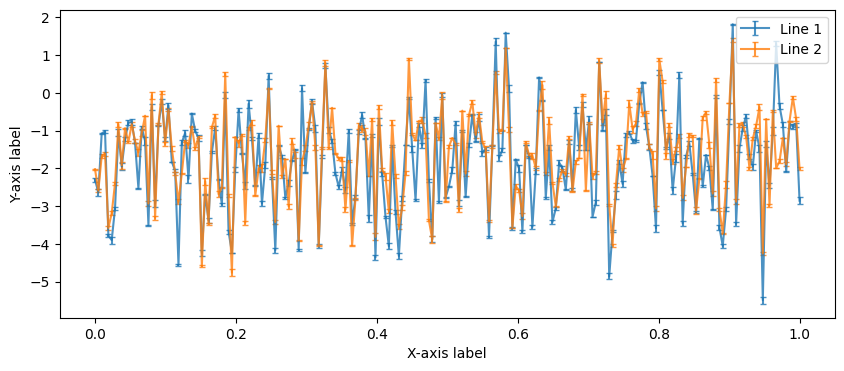

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
x = np.linspace(0, 1, 212)
y1 = np.mean(scores_rome, axis=0)
y2 = np.mean(scores, axis=0)
y1_err = np.random.rand(212) * 0.1
y2_err = np.random.rand(212) * 0.1

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 4))

# Plot lines with error bars
ax.errorbar(x, y1, yerr=y1_err, label='Line 1', alpha=0.8, capsize=2)
ax.errorbar(x, y2, yerr=y2_err, label='Line 2', alpha=0.8, capsize=2)

# Add legend and labels
ax.legend(loc='upper right')
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')

# Show plot
plt.show()

In [ ]:
words = np.array(list(wordlist))

In [ ]:
after = []
for p in predictions_rome:
  after.append([p, 1])

before = []
for p in predictions:
  before.append([p, 1])

dd = pd.DataFrame(data=after, columns=["Word", "Count"])
dd = dd.groupby(by="Word", as_index=False).agg({"Count":"count"})
dd = dd.sort_values(by="Count")

In [ ]:
import plotly.io as pio
import plotly.express as px
import kaleido
fig = px.bar(dd, y='Count', x='Word',
            title="Predicted words after editing")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces(marker_color='rgb(204,102,119)')
fig.show()

In [ ]:
from collections import defaultdict

countmap = defaultdict(int)
for word in wordlist:
  for entry in dataset:

    new = entry["requested_rewrite"]["target_new"]["str"]
    if word==new:
      countmap[word]+=1

countmap = dict(countmap)

In [ ]:
import pandas as pd
mask_overall = np.mean(scores, axis=0) <= np.mean(scores_rome, axis=0)
# mask = scores_rome > scores

print("Words with increased confidence: {}".format(len(higher)))
scores_diff = np.mean((scores_rome - scores)/scores, axis=0)

modif_stats = []
for word in wordlist:
  modif_stats.append(countmap[word])

data = np.concatenate((words.reshape(-1,1), scores_diff.reshape(-1,1), np.array(modif_stats).reshape(-1,1)), axis=1)

higher_df = pd.DataFrame(data=data, columns=["Word", "Confidence Change (%)", "Frequency of Editing"])
higher_df["Confidence Change (%)"] = higher_df["Confidence Change (%)"].astype(float)
higher_df["Frequency of Editing"] = higher_df["Frequency of Editing"].astype(float)
higher_df = higher_df.sort_values(by="Confidence Change (%)")

Words with increased confidence: 72


In [ ]:
print("Correlation b/w Frequency of Edits and Confidence Change: {}".format(higher_df['Frequency of Editing'].corr(higher_df['Confidence Change (%)'])))

Correlation b/w Frequency of Edits and Confidence Change: 0.07151658663775617


In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.9 MB/s eta 0:00:00


In [ ]:
import plotly.io as pio
import plotly.express as px
fig = px.bar(higher_df[higher_df["Confidence Change (%)"]>0], y='Confidence Change (%)', x='Word',
            title="Words with higher confidence of prediction after editing")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces(marker_color='rgb(214, 43, 43)')
fig.show()

In [ ]:
import plotly.io as pio
import plotly.express as px

fig = px.bar(higher_df[higher_df["Confidence Change (%)"]>0], y='Frequency of Editing', x='Word',
            title="Words with higher confidence of prediction after editing")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces(marker_color='rgb(214, 43, 43)')
fig.show()

In [ ]:
import plotly.io as pio
import plotly.express as px
fig = px.bar(higher_df[higher_df["Confidence Change (%)"]<=0], y='Confidence Change (%)', x='Word',
            title="Words with lower confidence of prediction after editing")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces(marker_color='rgb(15,133,84)')
fig.show()

In [ ]:
import plotly.io as pio
import plotly.express as px
fig = px.bar(higher_df[higher_df["Confidence Change (%)"]<=0], y='Frequency of Editing', x='Word',
            title="Words with higher confidence of prediction after editing")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces(marker_color='rgb(15,133,84)')
fig.show()

In [ ]:
mask = np.mean(scores, axis=0) > np.mean(scores_base, axis=0)

higher = words[mask]
scores_diff = np.mean(scores[:,mask], axis=0) - np.mean(scores_base[:,mask], axis=0)
data = np.concatenate((higher.reshape(-1,1), scores_diff.reshape(-1,1)), axis=1)

higher_df = pd.DataFrame(data=data, columns=["Word", "Prediciton Confidence Difference"])
higher_df["Prediciton Confidence Difference"] = higher_df["Prediciton Confidence Difference"].astype(float)
higher_df = higher_df.sort_values(by="Prediciton Confidence Difference")

import plotly.express as px

fig = px.bar(higher_df[:-4], y='Prediciton Confidence Difference', x='Word',
            title="Effects of Model Editing on Prediction Confidences")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
import plotly.express as px

fig = px.bar(higher_df[-4:], y='Prediciton Confidence Difference', x='Word',
            title="Effects of Model Editing on Prediction Confidences")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
import gensim.downloader as api
import numpy as np
import logging
from flair.data import Sentence
from flair.models import SequenceTagger
import re
import logging
from tqdm import tqdm


class ConfidenceEvaluator:
    
    def __init__(self) -> None:
        self.logger = logging.getLogger(__name__)
        self.logger.debug("Loading NER model")
        self.ner = SequenceTagger.load("flair/ner-english-fast")

    def get_named_entities(self, text):
    
        sentence = Sentence(text)
        self.ner.predict(sentence)
        ents = []
        for entity in sentence.get_spans('ner'):
            if entity.tag != "MISC":
                ents.append(entity.text)
        return ents

    
    def count_occurrences(self, word, sentence):
        
        pattern = re.compile(fr'\b{re.escape(word)}\b', re.IGNORECASE | re.DOTALL)
        occurrences = len(pattern.findall(sentence))
        return occurrences

    def get_logits(self, input_ids, model, device):
        
        input_ids = torch.tensor(input_ids).unsqueeze(0).to(device)
        
        return texts
            
    def run(self, edited_model, base_model, edited_model_device, base_model_device, tokenizer, edit_request):
        
        
        '''
        1. KLD between logits
        2. Difference in confidence of subject, target_new, target_old
        3. Difference in rank of subject, target_new, target_old
        4. Facet 2,3 for by entity type
        '''
        subject = edit_request["subject"]
        target_new = edit_request["target_new"]["str"]
        target_old = edit_request["target_old"]["str"]
        
        neighbours = self.get_head_and_tail_neighbours(subject)
        
        edited_model_similarity_to_target_new_arr = []
        base_model_similarity_to_target_new_arr = []
        similarity_to_current_arr = []
        edited_model_exact_match_arr = []
        base_model_exact_match_arr = []
        visited = set()
        generations = []
        
        for idx, neighbour in tqdm(enumerate(neighbours), total=len(neighbours)):
            
            visited.add(neighbour)
            neighbour_text = self.w2vformat_text(neighbour[0])

            edited_model_text = self.get_neighbour_generations(neighbour_text, edited_model, tokenizer, edited_model_device)
            base_model_text = self.get_neighbour_generations(neighbour_text, base_model, tokenizer, base_model_device)
            
            edited_model_ents = self.get_named_entities(edited_model_text)
            base_model_ents = self.get_named_entities(base_model_text)
            
            edited_model_similarity_to_target_new = self.knn_similarity(target_new, edited_model_ents)
            similarity_to_current = self.knn_similarity(subject, edited_model_ents)
            base_model_similarity_to_target_new = self.knn_similarity(target_new, base_model_ents)
            
            edited_model_similarity_to_target_new_arr.append(edited_model_similarity_to_target_new)
            base_model_similarity_to_target_new_arr.append(base_model_similarity_to_target_new)
            
            similarity_to_current_arr.append(similarity_to_current)
            
            edited_model_exact_match = self.count_occurrences(target_new, edited_model_text)
            base_model_exact_match = self.count_occurrences(target_new, base_model_text)
        
            edited_model_exact_match_arr.append(edited_model_exact_match)  
            base_model_exact_match_arr.append(base_model_exact_match)
            
            generation = {
                "prompt": neighbour_text,
                "edited_model": edited_model_text,
                "base_model": base_model_text,
            }
            
            generations.append(generation)
            
        edited_model_similarity_to_target_new_arr = np.array(edited_model_similarity_to_target_new_arr)
        base_model_similarity_to_target_new_arr = np.array(base_model_similarity_to_target_new_arr)
        similarity_to_current_arr = np.array(similarity_to_current_arr)
        
        edited_model_exact_match = np.array(edited_model_exact_match)
        base_model_exact_match = np.array(base_model_exact_match)
        
        edited_model_distance_ratio = np.divide(edited_model_similarity_to_target_new_arr, similarity_to_current_arr)
        base_model_distance_ratio = np.divide(base_model_similarity_to_target_new_arr, similarity_to_current_arr)
        
        drift = np.subtract(edited_model_distance_ratio, base_model_distance_ratio)
        em_drift = np.subtract(edited_model_exact_match, base_model_exact_match)
        
        results = {
            
            "drift": drift.tolist(),
            "edited_model_similarity_to_target_new":edited_model_similarity_to_target_new_arr.tolist(),
            "base_model_similarity_to_target_new":base_model_similarity_to_target_new_arr.tolist(),
            "similarity_to_current":similarity_to_current_arr.tolist(),
            "edited_model_exact_match": edited_model_exact_match_arr,
            "base_model_exact_match": base_model_exact_match_arr,
            "em_drift": em_drift.tolist(),
            "neighbours": list(visited),
            "edit_request": edit_request
            
        }
        
        return results, generations
        
        

NameError: name 'tokenizer' is not defined

In [ ]:

tokenizer_output = tokenizer.batch_encode_plus(padding="longest")

tokens_tensor = torch.tensor(tokenizer_output["input_ids"]).to(self.device)

indexed_tokens = tokenizer_output["input_ids"]
offset_mappings = tokenizer_output["offset_mapping"]

batch_size = tokens_tensor.shape[0]
max_seq_length =  tokens_tensor.shape[1]

# Predict all tokens
with torch.no_grad():
    outputs = self.model(tokens_tensor)

predictions = outputs[0]
last_predictions = predictions[:, -1, :]

probs = torch.nn.functional.softmax(last_predictions, dim=1)
top_next = [self.tokenizer.decode(i.item()).strip() for i in probs.topk(1)[1]]

word_probs = torch.zeros((batch_size, max_seq_length, len(word_list)))
word_is_prediction = torch.zeros((batch_size, max_seq_length, len(word_list)))


#compute hallucination
for batch_idx in range(batch_size):

internal_iter=0
for token_idx in range(0, max_seq_length-1, 1):

    if tokenizer_output["input_ids"][batch_idx][token_idx]==50256:
        break

    try:
        if offset_mappings[batch_idx][token_idx][0]!=0:
        current_token_type = batch["ner_tags"][batch_idx][internal_iter-1]
        else:
        current_token_type = batch["ner_tags"][batch_idx][internal_iter]
        internal_iter +=1
    except:
        # print(batch["ner_tags"][batch_idx])
        # print(len(batch["ner_tags"][batch_idx]))
        # print(internal_iter)
        # print(tokenizer_output["input_ids"][batch_idx][token_idx])
        pass

    if current_token_type not in ner2words:
        continue

    #print(current_token_type)
    #print(self.tokenizer.decode(tokenizer_output["input_ids"][batch_idx][token_idx]))

    possible_words = ner2words[current_token_type]
    #print(possible_words)
    for word in possible_words:
        word_tokens = word2tokens[word]
        if (probs[batch_idx, word_tokens[0]]==probs[batch_idx, :].max()):
        word_probs[batch_idx, token_idx, word2idx[word]]+=1

        tok_probs = torch.zeros(len(word_tokens))
        for i, token in enumerate(word_tokens):
            tok_probs[i] = predictions[batch_idx, token_idx, token]

        word_probs[batch_idx, token_idx, word2idx[word]] = torch.mean(torch.mean(tok_probs, dim=0)).item()

word_probs = torch.mean(word_probs, dim=1)
word_is_prediction = torch.sum(word_is_prediction, dim=1)
return top_next, word_probs, word_is_prediction